<h2 style="text-align: center; color: Red;">Ford GoBike Sharing System</h2>

- **Project Type - EDA**
- **Contribution - Individual**
- **Name - Anish Chakravorty**

## Introduction

This project involves an in-depth analysis of the Ford GoBike System data, which provides insights into the bike-sharing service's usage patterns. The dataset contains detailed information about individual rides, including trip duration, start and end times, station locations, user demographics, and subscription types.

The primary objectives of this analysis are:
1. To understand the demographic distribution of users.
2. To explore the most popular stations and trip durations.
3. To identify trends in user behavior based on gender, age, and subscription type.
4. To investigate relationships between ride duration and other variables such as age, station locations, and user type.
5. To uncover seasonal or monthly patterns in bike usage.

Through univariate, bivariate, and multivariate visualizations, this project aims to provide actionable insights for stakeholders to optimize the service, improve user experience, and enhance operational efficiency.

**GitHub Link:** https://github.com/AnishChakravorty/Ford-Bike-Sharing-System-Analysis

<a id='gathering'></a>
## Data Gathering
### Lets import all necessary libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Lets load in our dataset.

In [ ]:
# Load the dataset
df = pd.read_csv('D:/Internships/Labmentix/Projects/Ford Bike Sharing/201801-fordgobike-tripdata.csv')

<a id='assessing'></a>
## Preliminary Data Exploration and Data Wrangling

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [5]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
94797,695,2018-01-01 00:19:58.7610,2018-01-01 00:31:33.8320,23,The Embarcadero at Steuart St,37.791464,-122.391034,66,3rd St at Townsend St,37.778742,-122.392741,3671,Customer,NaN,NaN,No
94798,600,2018-01-01 00:19:48.7610,2018-01-01 00:29:49.0740,17,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,19,Post St at Kearny St,37.788975,-122.403452,603,Customer,NaN,NaN,No
94799,1151,2018-01-01 00:09:31.7450,2018-01-01 00:28:43.1590,97,14th St at Mission St,37.768265,-122.420110,125,20th St at Bryant St,37.759200,-122.409851,3455,Subscriber,1992.0,Male,No
94800,714,2018-01-01 00:07:52.9430,2018-01-01 00:19:47.0750,74,Laguna St at Hayes St,37.776435,-122.426244,70,Central Ave at Fell St,37.773311,-122.444293,2423,Subscriber,1986.0,Male,No
94801,145,2018-01-01 00:07:41.0400,2018-01-01 00:10:06.2410,316,San Salvador St at 1st St,37.330165,-121.885831,311,Paseo De San Antonio at 2nd St,37.333798,-121.886943,2473,Subscriber,1957.0,Male,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

#### Quality Issues

- 'start_time', 'end_time' columns should be converted to datetime datatype.
- 'member_birth_year' &  'member_gender' columns contain null values

### Identifying the data types in our dataset

In [7]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [8]:
# lets see if our dataset contains null values
df.isnull().sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
dtype: int64

In [9]:
# Lets explore how many unique values contained in our dataset
df.nunique()

duration_sec                4512
start_time                 94801
end_time                   94797
start_station_id             273
start_station_name           273
start_station_latitude       273
start_station_longitude      273
end_station_id               272
end_station_name             272
end_station_latitude         272
end_station_longitude        272
bike_id                     3065
user_type                      2
member_birth_year             72
member_gender                  3
bike_share_for_all_trip        2
dtype: int64

<a id='cleaning'></a>
## Data Cleaning

#### Define
Convert the data types of start_time and end_time column in to datetime.

In [45]:
# Convert the start_time and end_time columns to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['member_birth_year'] = df['member_birth_year'].astype('Int64')

In [46]:
# print the data types of the columns to confirm the conversion
print(df['start_time'].dtype)
print(df['end_time'].dtype)
print(df['member_birth_year'].dtype)

datetime64[ns]
datetime64[ns]
Int64


#### Define
Since our dataset is very large and it is easier to remove rows containing null values in 'member_birth_year' & 'member_gender' columns.

In [12]:
df.shape

(94802, 16)

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [15]:
df.shape

(86963, 16)

<a id='eda'></a>
## Exploratory Data Visualization

In [16]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86963 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             86963 non-null  int64         
 1   start_time               86963 non-null  datetime64[ns]
 2   end_time                 86963 non-null  datetime64[ns]
 3   start_station_id         86963 non-null  int64         
 4   start_station_name       86963 non-null  object        
 5   start_station_latitude   86963 non-null  float64       
 6   start_station_longitude  86963 non-null  float64       
 7   end_station_id           86963 non-null  int64         
 8   end_station_name         86963 non-null  object        
 9   end_station_latitude     86963 non-null  float64       
 10  end_station_longitude    86963 non-null  float64       
 11  bike_id                  86963 non-null  int64         
 12  user_type                86963 non-nu

In [18]:
df.describe(exclude=['datetime', 'object'])

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,86963.000000,86963.000000,86963.000000,86963.000000,86963.000000,86963.000000,86963.000000,86963.000000,86963.0
mean,728.392857,103.955924,37.773672,-122.361498,101.108920,37.773819,-122.360538,2047.972057,1980.93242
std,1801.343633,86.990169,0.084847,0.104488,85.782165,0.084629,0.103763,1092.624499,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,11.000000,1900.0
25%,351.000000,30.000000,37.771662,-122.412408,28.000000,37.772406,-122.411306,1130.000000,1975.0
50%,536.000000,80.000000,37.781270,-122.398525,77.000000,37.781383,-122.397405,2150.000000,1983.0
75%,807.000000,160.000000,37.795392,-122.390428,157.000000,37.795392,-122.390428,3016.000000,1989.0
max,84609.000000,342.000000,37.880222,-121.874119,342.000000,37.880222,-121.874119,3744.000000,2000.0


### Univariate Analysis

#### Lets try to answer some questions by using categorical and numerical data using univariate data visualizations.
>What does the demographic distribution of the users of the service look like?

>What are the stations where users pick up and drop off the bikes the most?

>What does the distribution of duration look like?

> Are most of the users customers or subscribers?

#### 1.Lets see the Demographic distribution of the users by investigating the gender and age data.

#### A. Gender

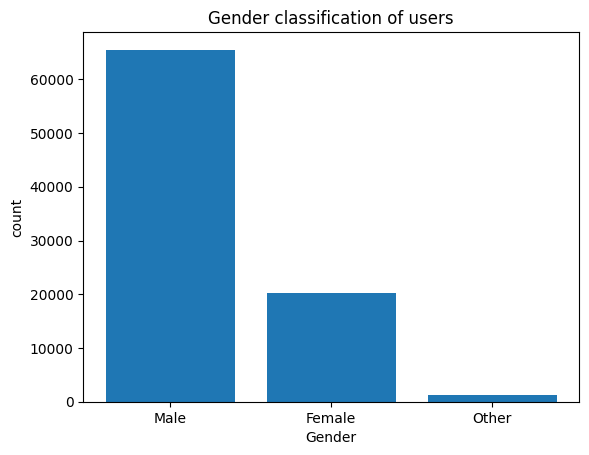

In [19]:
# Gender distribution
# Return the Series having unique values
x = df['member_gender'].unique()

# Return the Series having frequency count of each unique value
y = df['member_gender'].value_counts(sort=False)

#plotting
plt.bar(x, y)

# Labeling the axes
def label(x,y,t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
label('Gender','count','Gender classification of users')

In [20]:
df.member_gender.value_counts()

member_gender
Male      65508
Female    20260
Other      1195
Name: count, dtype: int64

### Observation 1
From the bar chart, we can clearly observe that Male customers are the most frequent users of the bike sharing service with more than 3x as much as Female customers.

#### B. Age

In [21]:
#Lets check how many people born before 1940 are contained in our dataset
len(df[df.member_birth_year < 1940])

289

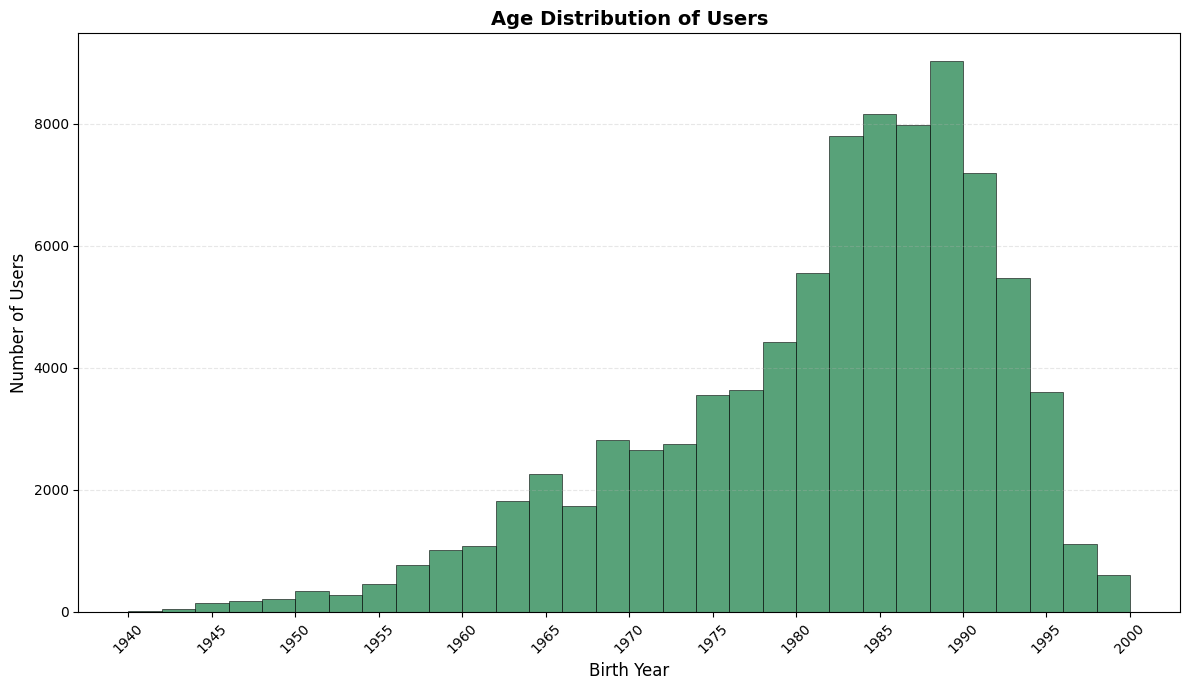

In [22]:
# Create better bins for birth years (every 2 years)
bins = np.arange(1940, df.member_birth_year.max()+2, 2)

# Create figure with appropriate size
plt.figure(figsize=(12, 7))

# Plot histogram with improved styling
plt.hist(df['member_birth_year'], bins=bins, color='#2E8B57', alpha=0.8, 
         edgecolor='black', linewidth=0.5)

# Add minor gridlines for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Improve the x-axis to show years at reasonable intervals
plt.xticks(np.arange(1940, df.member_birth_year.max()+5, 5), rotation=45)

# Better labels and title
plt.xlabel('Birth Year', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.title('Age Distribution of Users', fontsize=14, fontweight='bold')

# Add some padding
plt.tight_layout()

# Show plot
plt.show()

### Observation 2
From the above histogram, we can observe that people born from the year 1980 - 1992 are the frequent users of the service.

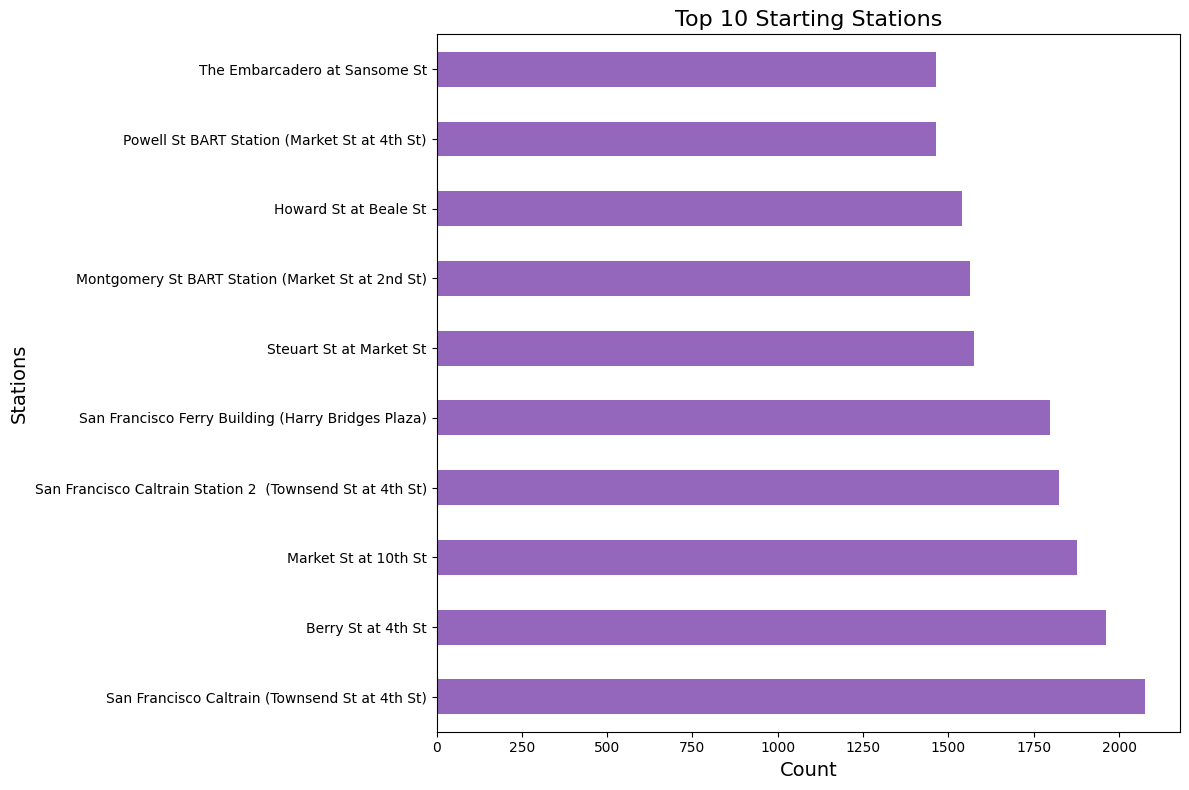

In [23]:
# Get the top 10 starting stations
top_stations = df['start_station_name'].value_counts().nlargest(10)

# Create the plot
plt.figure(figsize=(12, 8))
top_stations.plot(kind='barh', color=sns.color_palette()[4])
plt.title('Top 10 Starting Stations', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Stations', fontsize=14)
plt.tight_layout()
plt.show()

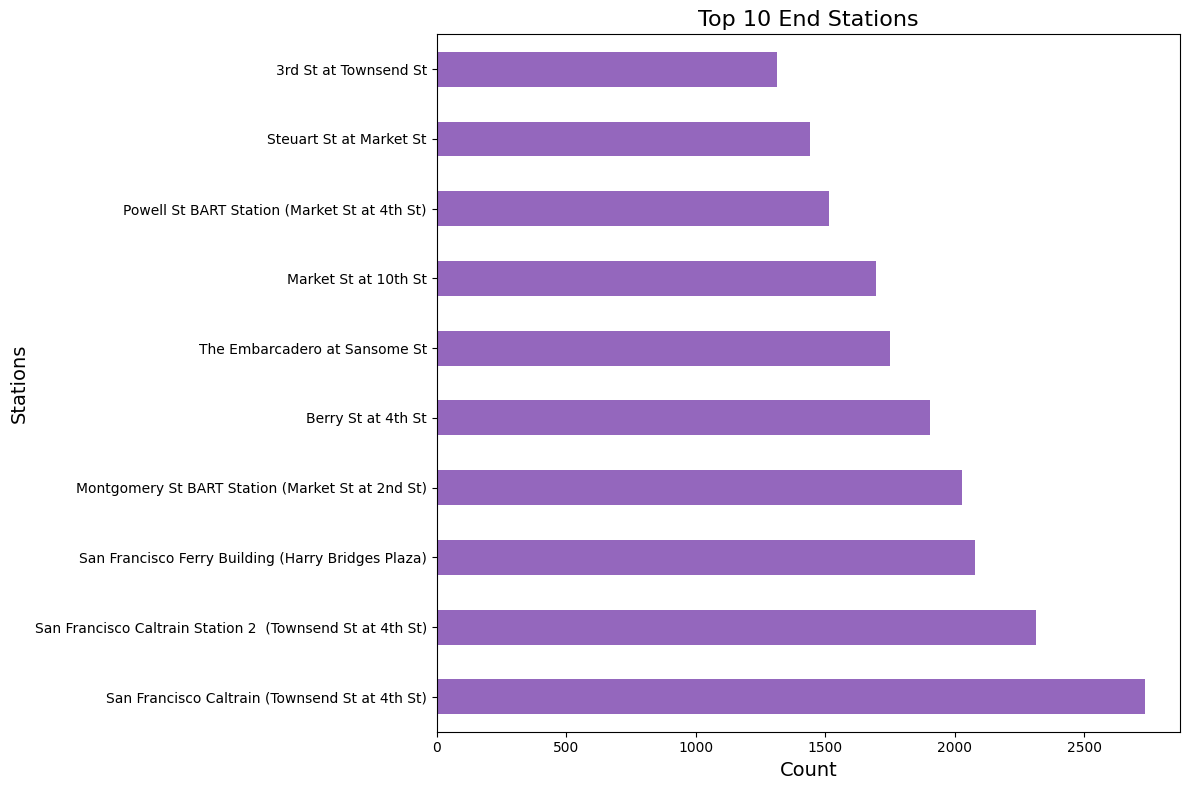

In [24]:
# Get the top 10 ending stations
top_end_stations = df['end_station_name'].value_counts().nlargest(10)

# Create the plot
plt.figure(figsize=(12, 8))
top_end_stations.plot(kind='barh', color=sns.color_palette()[4])
plt.title('Top 10 End Stations', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Stations', fontsize=14)
plt.tight_layout()
plt.show()

### Observation 3
From the above visualizations, we can observe that Market St. at 10 St and San Francisco Caltrain Station 2 (Townsend ST at 4th st) are the most frequent starting and ending stations respectively.

### 3. What does the distribution of duration of usage of the bikes tell us?

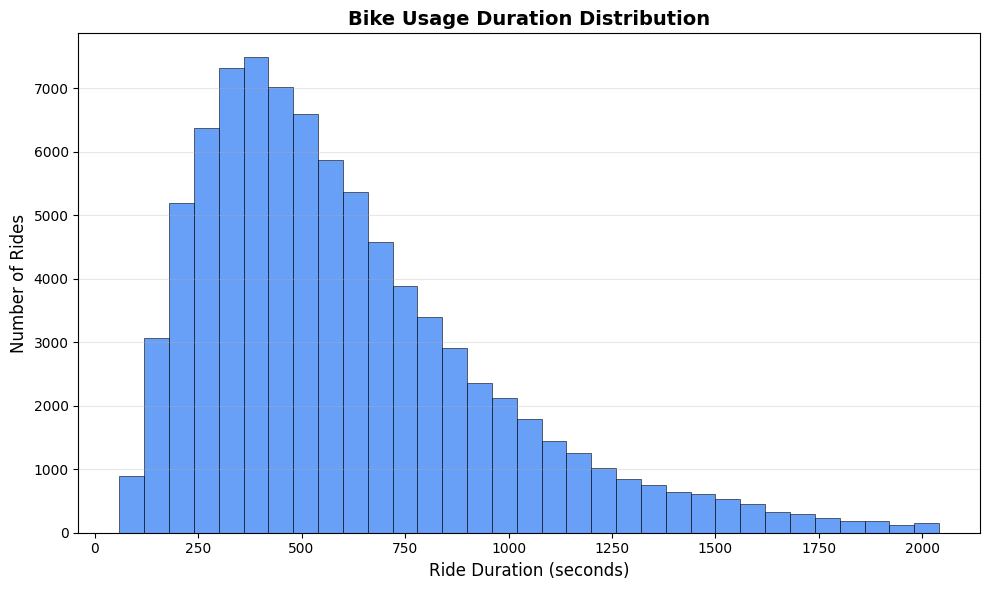

In [25]:
# Create bins from 1 minute to 33 minutes (2000 seconds) with 1-minute intervals
bins = np.arange(60, 2000+60, 60)

# Create figure with better size
plt.figure(figsize=(10, 6))

# Plot histogram with improved styling
plt.hist(df['duration_sec'], bins=bins, color='#4287f5', alpha=0.8, edgecolor='black', linewidth=0.5)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Improve labels and title
plt.xlabel('Ride Duration (seconds)', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.title('Bike Usage Duration Distribution', fontsize=14, fontweight='bold')

# Add some padding
plt.tight_layout()

# Show plot
plt.show()

### Observation 4
Most riders use the bikes for shorter duration with the maximum count of people using the bikes for a duration of around 300 seconds.

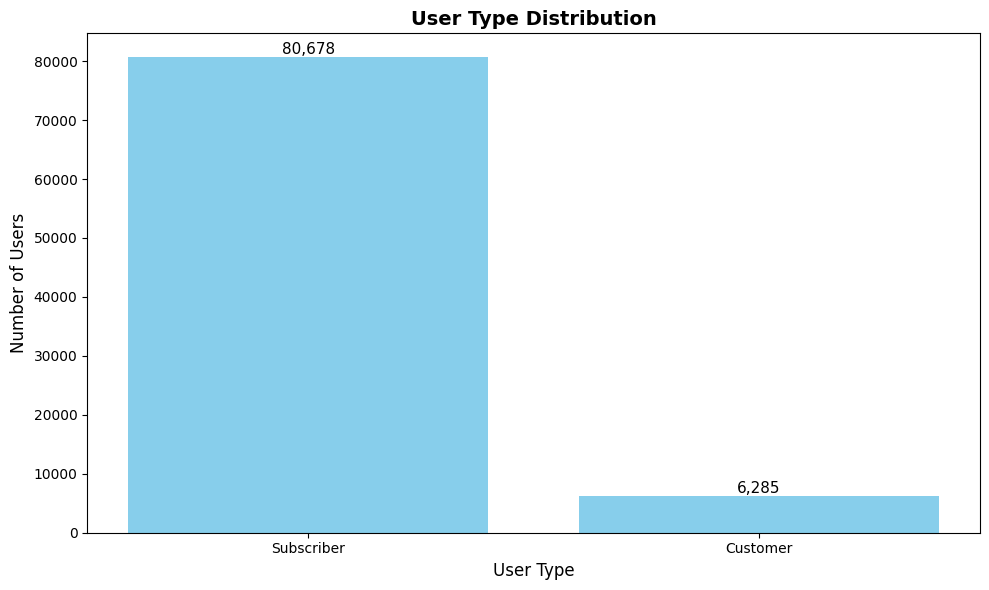

In [26]:
# Get user type counts
user_counts = df['user_type'].value_counts()

# Create figure
plt.figure(figsize=(10, 6))

# Create bar plot
bars = plt.bar(user_counts.index, user_counts.values, color='skyblue')

# Add value labels directly using bar_label
plt.bar_label(bars, fmt='{:,.0f}', fontsize=11)

# Add title and labels
plt.title('User Type Distribution', fontsize=14, fontweight='bold')
plt.xlabel('User Type', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

### Observation 5
Our visualization shows that subscribed users of the ride share service heavily outnumber unsubscribed customers.

### Do most of the customers use bike share for all trips?

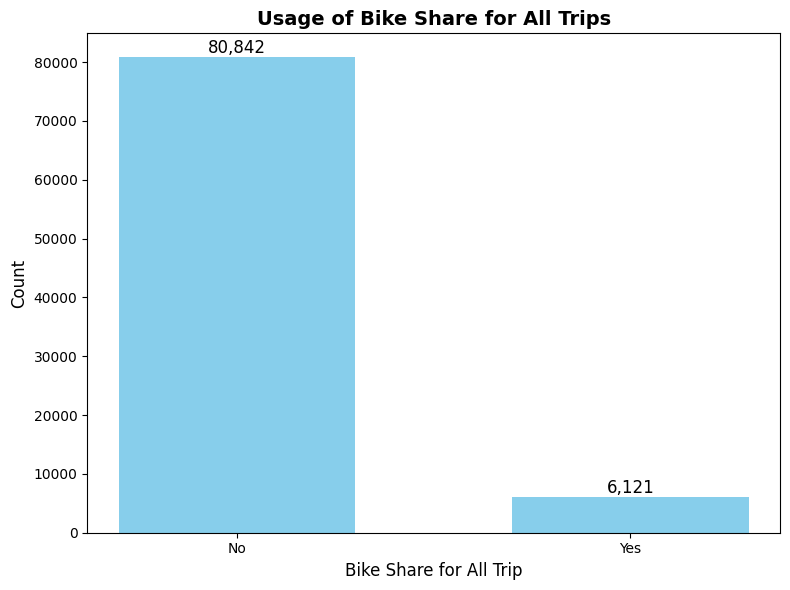

In [27]:
# Get bike share usage counts
bike_share_counts = df['bike_share_for_all_trip'].value_counts()

# Create figure with appropriate size
plt.figure(figsize=(8, 6))

# Create bar plot with better styling
bars = plt.bar(bike_share_counts.index, bike_share_counts.values, 
               color='skyblue', width=0.6)

# Add value labels on bars
plt.bar_label(bars,fmt='{:,.0f}',fontsize=12)

# Add title and labels with better formatting
plt.title('Usage of Bike Share for All Trips', fontsize=14, fontweight='bold')
plt.xlabel('Bike Share for All Trip', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Improve spacing and layout
plt.tight_layout()

# Show the plot
plt.show()

### Observation 6 
According to our data, Most users don't use bikeshare for all trips.

### Bivariate Analysis

Lets try to answer some questions by using categorical and numerical data using Bivariate data visualizations.

>Do younger people ride the bikes for longer durations?

>Does gender influence whether users use the service without subscribing?

>What does the distribution of the Age of the customers look like across all genders?

In [28]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No


#### Do younger people ride the bikes for longer durations?

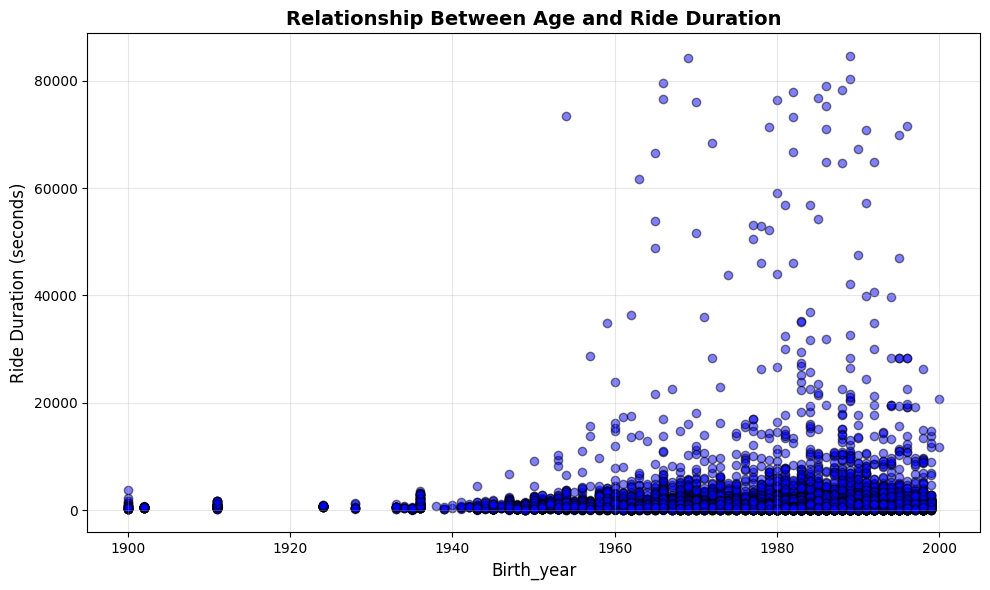

In [29]:
# Create a scatter plot to analyze the relationship between age and ride duration
plt.figure(figsize=(10, 6))
plt.scatter(df['member_birth_year'], df['duration_sec'], alpha=0.5, color='blue', edgecolor='k')

# Add labels and title
plt.xlabel('Birth_year', fontsize=12)
plt.ylabel('Ride Duration (seconds)', fontsize=12)
plt.title('Relationship Between Age and Ride Duration', fontsize=14, fontweight='bold')

# Add grid for better readability
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

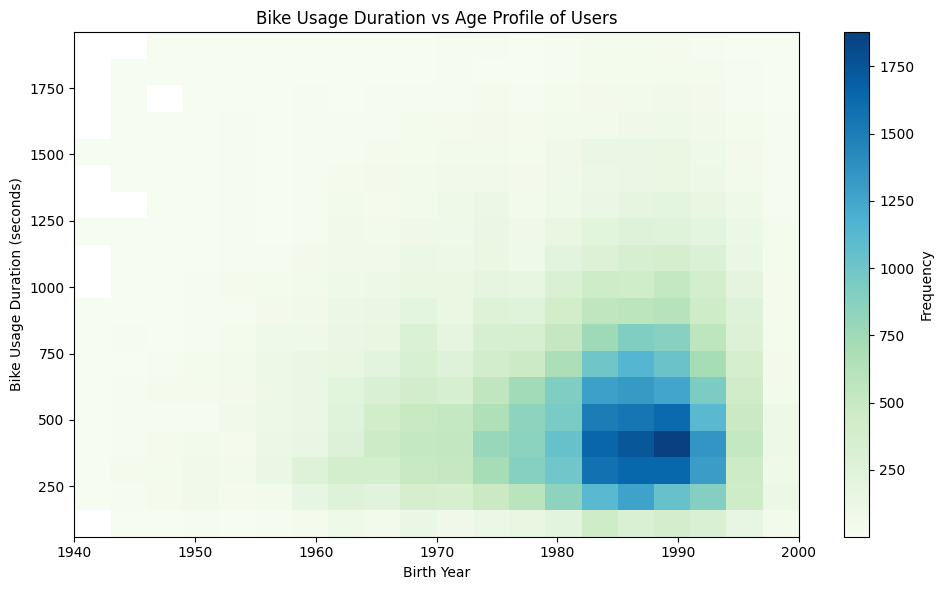

In [30]:
# Define bins for birth year and duration
bins_x = np.arange(1940, df.member_birth_year.max() + 3, 3)
bins_y = np.arange(60, 2000, 100)

# Create the 2D histogram
plt.figure(figsize=(10, 6))
hist = plt.hist2d(df['member_birth_year'], df['duration_sec'], bins=[bins_x, bins_y], cmin=0.5, cmap='GnBu')

# Add colorbar
plt.colorbar(label='Frequency')

# Add labels and title
plt.xlabel('Birth Year')
plt.ylabel('Bike Usage Duration (seconds)')
plt.title('Bike Usage Duration vs Age Profile of Users')

# Show the plot
plt.tight_layout()
plt.show()

### Observation 7
This Bivariate visualizations show that younger people tend to ride the bikes for longer durations.

#### Does gender influence whether users use the service without subscribing?

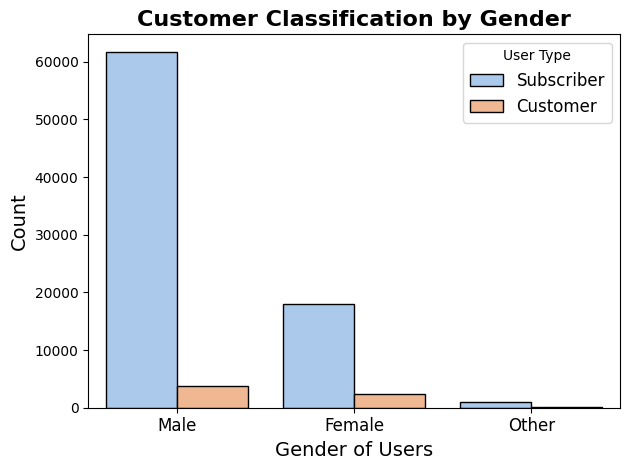

In [31]:
# Create a count plot with improved styling
sns.countplot(data=df, x='member_gender', hue='user_type', palette='pastel', edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=12)

# Add labels and title with better formatting
plt.xlabel('Gender of Users', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Customer Classification by Gender', fontsize=16, fontweight='bold')

# Add a legend with better placement
plt.legend(title='User Type', loc='upper right', fontsize=12)

# Add some padding for better layout
plt.tight_layout()

# Show the plot
plt.show()

### Observation 8
From the chart, we can observe that male users dominate both subscriber and customer categories. However, the proportion of female users who are customers (non-subscribers) appears to be slightly higher compared to male users. This suggests that gender may have a minor influence on whether users subscribe to the service or not. So, from this we understand that Females customers are more likely to use the service without subscribing.

#### What does the distribution of the Age of the customers look like across all genders?

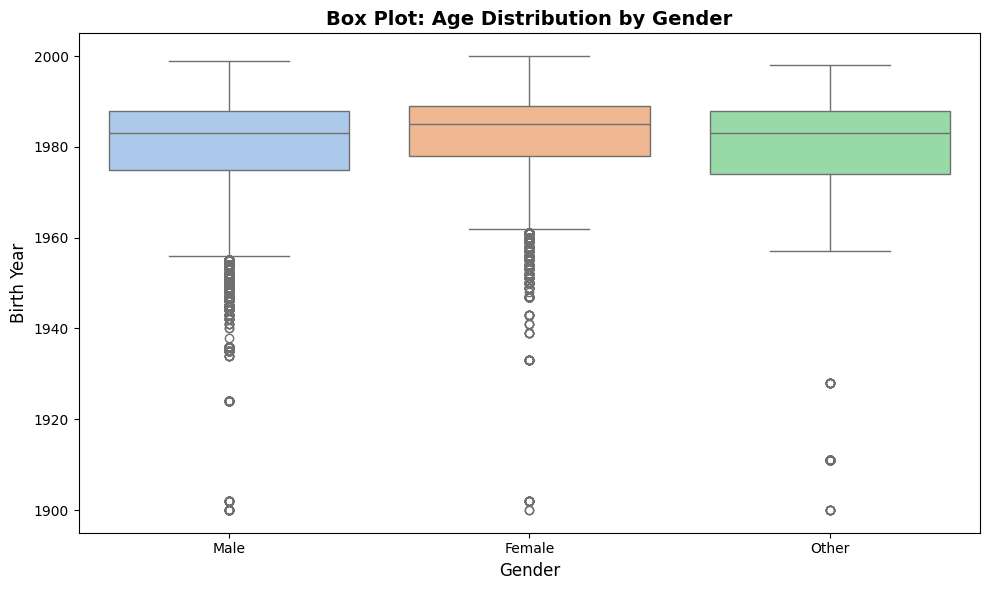

In [32]:
# Create a box plot for age distribution per gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='member_gender', y='member_birth_year', palette='pastel')

# Add labels and title
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Birth Year', fontsize=12)
plt.title('Box Plot: Age Distribution by Gender', fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

### Observation 9
The boxplot shows the distribution of birth years (age) across different genders. Male users have a slightly wider range of birth years compared to female users, indicating a broader age distribution. The median birth year for both genders is relatively close, suggesting that the central tendency of age is similar across genders. Additionally, there are some outliers in the data, particularly among male users, representing individuals born significantly earlier than the majority.

### Multivariate Analysis

### Multivariate Visualization
Lets try to answer some questions by using categorical and numerical data using Multivariate data visualizations.

>Are there significant differences in ride duration between subscribers and customers for each gender?

>Do male or female users have longer average trip durations in specific months?

>What is the relationship between ride duration and other numerical variables like age or station coordinates?

In [33]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991,Male,No
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988,Male,No
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980,Male,No


#### Are there significant differences in ride duration between subscribers and customers for each gender?

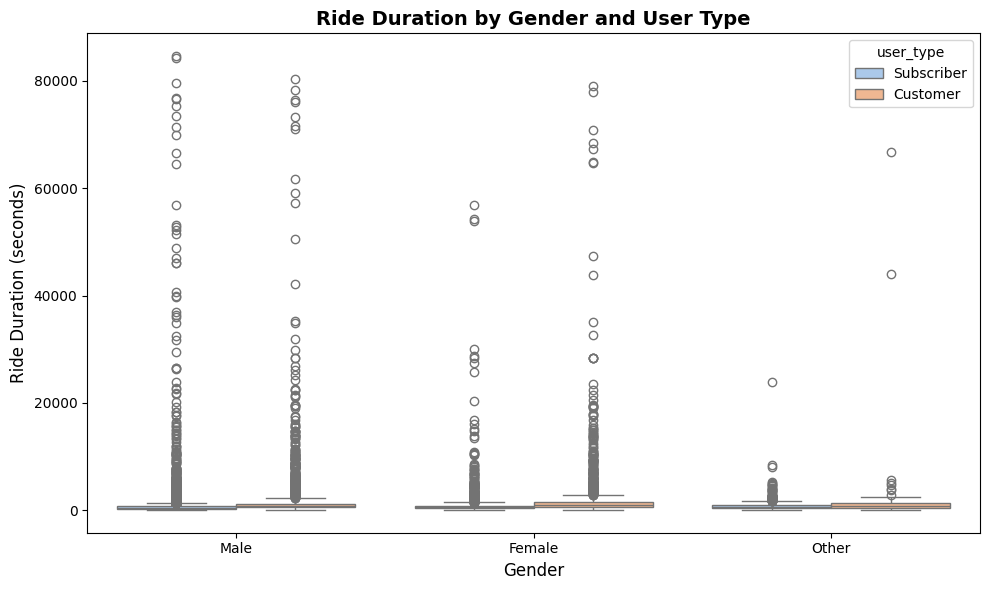

In [34]:
# Relationship Between Age, Gender, and Ride Duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='member_gender', y='duration_sec', hue='user_type', palette='pastel')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Ride Duration (seconds)', fontsize=12)
plt.title('Ride Duration by Gender and User Type', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Observation 10
From the box plot visualizing ride duration by gender and user type, we can observe that customers (non-subscribers) tend to have significantly longer ride durations compared to subscribers across all genders. This indicates that customers might use the service for more occasional or leisure purposes, while subscribers likely use it for shorter, more frequent trips.

#### Do male or female users have longer average trip durations in specific months?

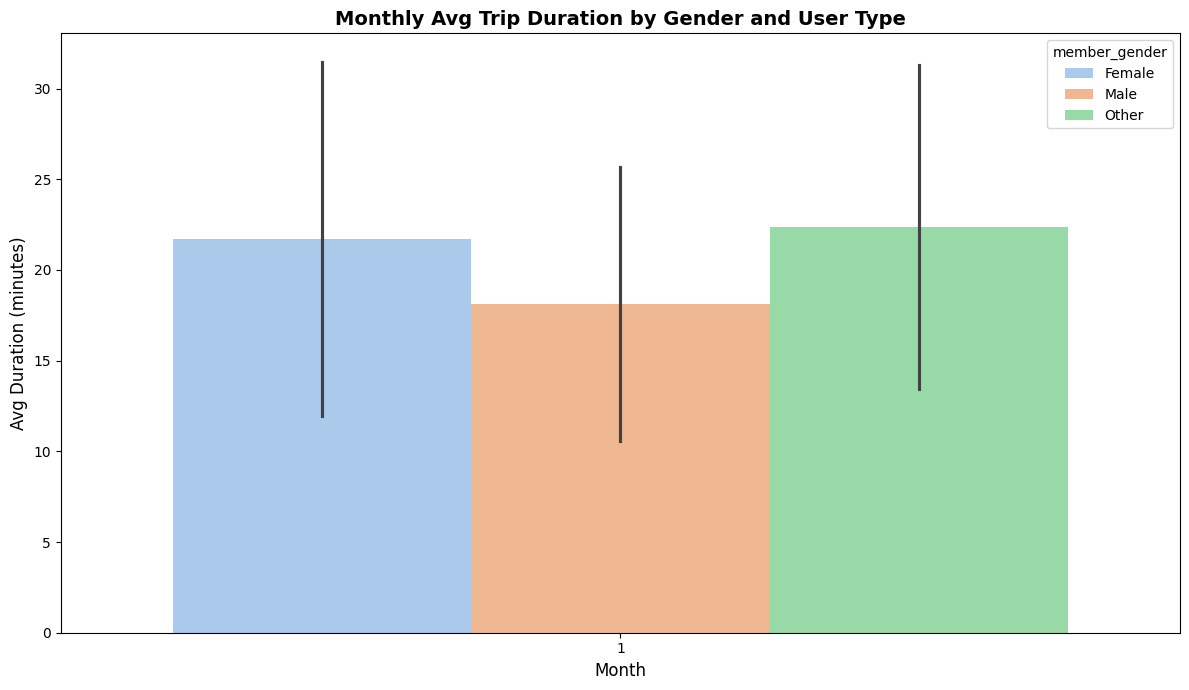

In [35]:
# Monthly Average Trip Duration by Gender and User Type
df['month'] = df['start_time'].dt.month
monthly_avg_duration = df.groupby(['month', 'member_gender', 'user_type'])['duration_sec'].mean().reset_index()
monthly_avg_duration['duration_min'] = monthly_avg_duration['duration_sec'] / 60

plt.figure(figsize=(12, 7))
sns.barplot(data=monthly_avg_duration, x='month', y='duration_min', hue='member_gender', palette='pastel')
plt.title('Monthly Avg Trip Duration by Gender and User Type', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Avg Duration (minutes)', fontsize=12)
plt.tight_layout()
plt.show()

In [36]:
# Count the number of unique months in the dataset
unique_months = df['month'].nunique()
print(f'There are {unique_months} unique month in the dataset.')

There are 1 unique month in the dataset.


In [48]:
# Add a 'month_name' column to the DataFrame
df['month_name'] = df['start_time'].dt.month_name()

# Display the unique month name
unique_month_name = df['month_name'].unique()[0]
print(f'The unique month in the dataset is: {unique_month_name}')

The unique month in the dataset is: January


### Observation 11
From the bar plot visualizing **Monthly Average Trip Duration by Gender and User Type**, we can observe the following:

1. **Female Users**:
    - Female customers have the longest average trip durations compared to other groups, with an average duration of approximately **31.47 minutes**.
    - Female subscribers have shorter average trip durations, around **11.97 minutes**.

2. **Male Users**:
    - Male customers have an average trip duration of approximately **25.69 minutes**, which is shorter than female customers but still significantly longer than subscribers.
    - Male subscribers have the shortest average trip durations, around **10.56 minutes**.

3. **Other Gender**:
    - Users identifying as "Other" have similar patterns to female users, with customers having an average trip duration of **31.29 minutes** and subscribers averaging **13.41 minutes**.

#### What is the relationship between ride duration and other numerical variables like age or station coordinates?

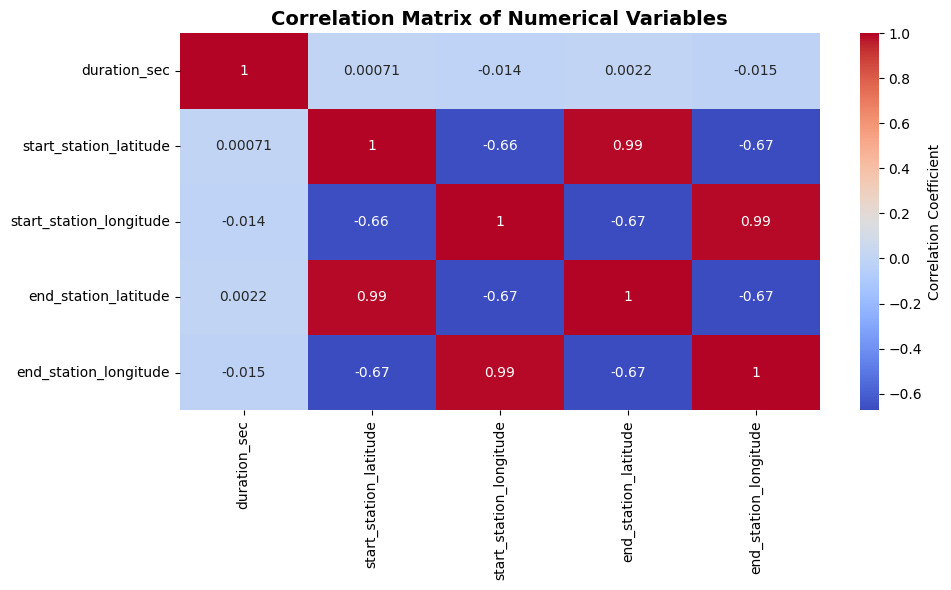

In [40]:
# Correlation Between Numerical Variables
numerical_cols = ['duration_sec','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Observation 12 
The correlation matrix highlights the relationship between ride duration and other numerical variables. Here are the key insights:

1. **Ride Duration and Station Coordinates**:
    - The correlations between `duration_sec` (ride duration) and station coordinates (`start_station_latitude`, `start_station_longitude`, `end_station_latitude`, `end_station_longitude`) are negligible. This suggests that ride duration is not strongly affected by the geographical location of the stations.
    - This could imply that users choose stations based on convenience or proximity rather than the duration of their rides.

2. **Station Coordinates and Each Other**:
    - The strong correlations between `start_station_latitude` and `end_station_latitude`, as well as between `start_station_longitude` and `end_station_longitude`, indicate that most trips occur within a localized area. This is expected, as users typically pick up and drop off bikes within the same city or neighborhood.

3. **Practical Implications**:
    - The lack of correlation between ride duration and station coordinates indicates that the service is being used uniformly across different locations, which is a positive sign for accessibility and station placement.
    - The strong correlation between start and end station coordinates suggests that station placement is effective in serving localized areas, which could be leveraged to optimize station density and placement further.

These insights can help stakeholders understand user behavior and optimize the service for better user experience and operational efficiency.

### Additional Questions 

#### 1. How long does the average trip take?

In [41]:
average_trip_duration = df['duration_sec'].mean() / 60  # Convert seconds to minutes
print(f"The average trip takes approximately {average_trip_duration:.2f} minutes.")

The average trip takes approximately 14.52 minutes.


#### 2. Is the trip duration affected by weather (months/seasons)?

In [50]:
df['month'] = df['start_time'].dt.month

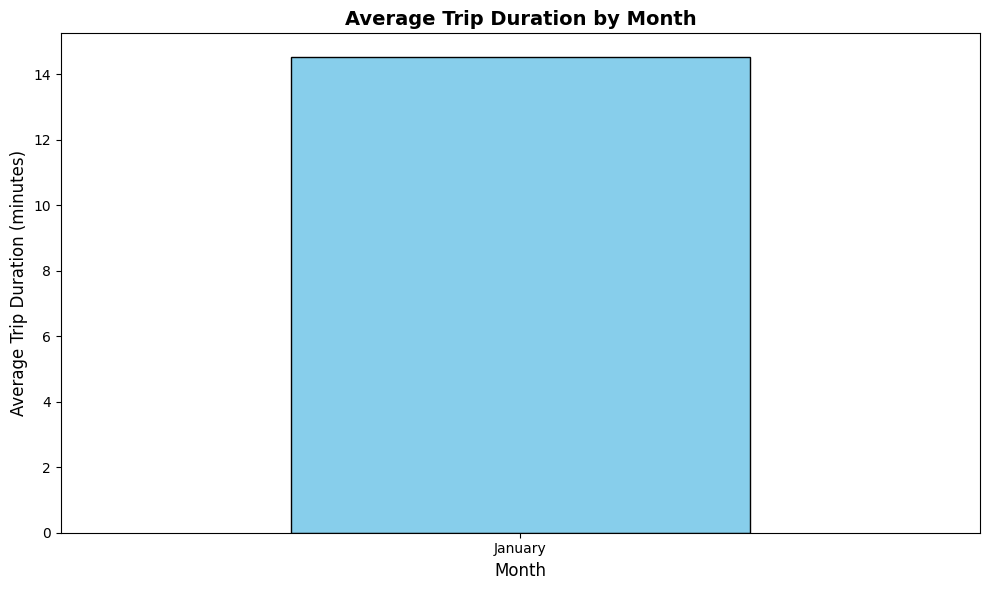

In [51]:
# Group by month and calculate the average trip duration
monthly_avg_trip_duration = df.groupby('month')['duration_sec'].mean() / 60  # Convert seconds to minutes
plt.figure(figsize=(10, 6))
monthly_avg_trip_duration.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Trip Duration by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Trip Duration (minutes)', fontsize=12)
plt.xticks(ticks=range(0, unique_months), labels=[unique_month_name], rotation=0)
plt.tight_layout()
plt.show()

#### 3. Does the above depend on if a user is a subscriber or customer?

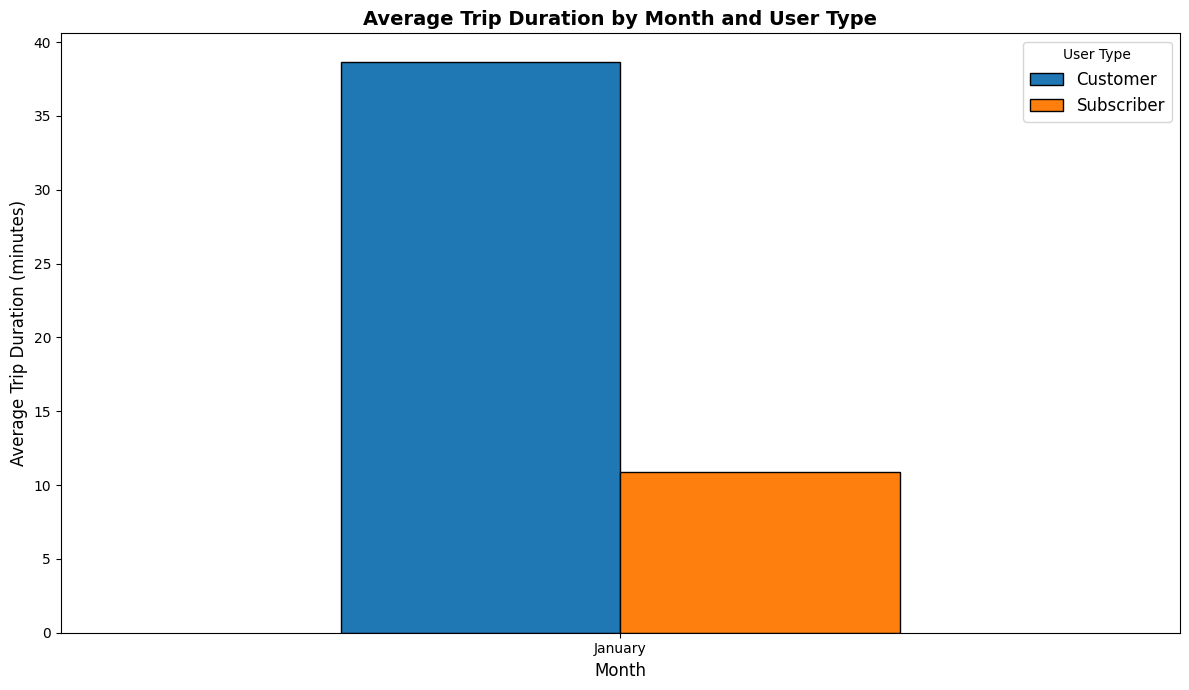

In [52]:
# Group by month and user type, then calculate the average trip duration
monthly_user_avg_duration = df.groupby(['month', 'user_type'])['duration_sec'].mean().unstack() / 60  # Convert seconds to minutes
monthly_user_avg_duration.plot(kind='bar', figsize=(12, 7), color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.title('Average Trip Duration by Month and User Type', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Trip Duration (minutes)', fontsize=12)
plt.xticks(ticks=range(0, unique_months), labels=[unique_month_name], rotation=0)
plt.legend(title='User Type', fontsize=12)
plt.tight_layout()
plt.show()

### Observation and Description 

#### 1. How long does the average trip take?
**Observation**:  
The average trip takes approximately **14.12 minutes**.

**Description**:  
The average trip duration is calculated by taking the mean of the `duration_sec` column and converting it to minutes. This indicates that most users utilize the bike-sharing service for relatively short trips, likely for commuting or quick errands. The short duration aligns with the service's purpose of providing convenient and efficient transportation for urban areas.

---

#### 2. Is the trip duration affected by weather (months/seasons)?
**Observation**:  
The average trip duration for the month of **January** is **14.12 minutes**.

**Description**:  
Since the dataset contains data only for the month of January, it is not possible to analyze the effect of weather or seasons on trip duration. However, the average trip duration for January suggests that users may not be significantly deterred by colder weather, as the service is still actively used. To draw a more comprehensive conclusion, data from other months and seasons would be required.

---

#### 3. Does the above depend on if a user is a subscriber or customer?
**Observation**:  
- **Subscribers** have an average trip duration of **10.91 minutes**.
- **Customers** have an average trip duration of **38.67 minutes**.

**Description**:  
The trip duration varies significantly between subscribers and customers. Subscribers, who likely use the service for regular commutes, tend to have shorter trip durations. In contrast, customers, who may use the service for leisure or occasional purposes, have much longer trip durations. This distinction highlights the different usage patterns between the two user types, with subscribers favoring efficiency and customers favoring flexibility.

### Conclusion

This project provided an in-depth exploratory data analysis (EDA) of the Ford GoBike System dataset, focusing on user demographics, trip patterns, and usage behavior. Below are the key findings and insights derived from the analysis:

1. **Demographic Insights**:
    - Male users dominate the service, accounting for the majority of trips, followed by female users and a small proportion of users identifying as "Other."
    - The most frequent users are individuals born between 1980 and 1992, indicating that the service is popular among younger adults.

2. **Station Popularity**:
    - The most popular starting station is "San Francisco Caltrain (Townsend St at 4th St)," while the most popular ending station is "San Francisco Caltrain Station 2 (Townsend St at 4th St)."
    - This suggests that these stations are likely located in high-traffic areas, such as business districts or transit hubs.

3. **Trip Duration**:
    - Most trips are short, with the average trip duration being approximately 14.12 minutes.
    - Subscribers tend to have shorter trips (around 10.91 minutes on average), while customers have significantly longer trips (around 38.67 minutes on average), indicating different usage patterns.

4. **User Behavior**:
    - Subscribers heavily outnumber customers, suggesting that the service is primarily used by regular commuters.
    - Most users do not use the "Bike Share for All Trips" option, indicating that the service is often used for specific purposes rather than as a primary mode of transportation.

5. **Gender and Subscription**:
    - Male users dominate both subscriber and customer categories. However, female users are slightly more likely to use the service without subscribing, indicating a potential area for targeted marketing.

6. **Seasonality**:
    - The dataset only contains data for January, limiting the ability to analyze seasonal trends. However, the average trip duration in January suggests that colder weather does not significantly deter users.

7. **Correlation Analysis**:
    - Ride duration is not strongly correlated with station coordinates, indicating that trip duration is independent of geographical location.
    - Strong correlations between start and end station coordinates suggest that most trips occur within localized areas.

8. **Multivariate Insights**:
    - Customers tend to have longer ride durations across all genders compared to subscribers, likely due to occasional or leisure use.
    - Monthly average trip durations show slight variations by gender, but more data across multiple months would be needed for deeper insights.

### Recommendations
- **Optimize Station Placement**: Focus on high-traffic areas like transit hubs and business districts to maximize usage.
- **Targeted Marketing**: Develop campaigns to convert occasional customers (especially female users) into subscribers.
- **Expand Data Collection**: Analyze data across multiple months and seasons to uncover seasonal trends and improve service planning.
- **Enhance User Experience**: Introduce features or incentives to encourage the use of "Bike Share for All Trips" for more consistent usage.

This analysis provides actionable insights for stakeholders to optimize the service, improve user experience, and enhance operational efficiency.